<a href="https://colab.research.google.com/github/abdulaziz-ibrahim27/smoke_detection_problem/blob/main/smoke_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import essential libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

In [ ]:
# fetch the data from github
!wget https://raw.githubusercontent.com/abdulaziz-ibrahim27/files_host/main/smoke_detection_iot.csv

--2022-10-01 18:17:54--  https://raw.githubusercontent.com/abdulaziz-ibrahim27/files_host/main/smoke_detection_iot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5834376 (5.6M) [text/plain]
Saving to: ‘smoke_detection_iot.csv’

smoke_detection_iot 100%[===================>]   5.56M  --.-KB/s    in 0.02s   

2022-10-01 18:17:54 (320 MB/s) - ‘smoke_detection_iot.csv’ saved [5834376/5834376]



# Explanatory Data Analysis

In [ ]:
df = pd.read_csv('smoke_detection_iot.csv')

In [ ]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['unnamed: 0', 'utc', 'temperature[c]', 'humidity[%]', 'tvoc[ppb]',
       'eco2[ppm]', 'raw h2', 'raw ethanol', 'pressure[hpa]', 'pm1.0', 'pm2.5',
       'nc0.5', 'nc1.0', 'nc2.5', 'cnt', 'fire alarm'],
      dtype='object')

In [ ]:
df.shape

(62630, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unnamed: 0      62630 non-null  int64  
 1   utc             62630 non-null  int64  
 2   temperature[c]  62630 non-null  float64
 3   humidity[%]     62630 non-null  float64
 4   tvoc[ppb]       62630 non-null  int64  
 5   eco2[ppm]       62630 non-null  int64  
 6   raw h2          62630 non-null  int64  
 7   raw ethanol     62630 non-null  int64  
 8   pressure[hpa]   62630 non-null  float64
 9   pm1.0           62630 non-null  float64
 10  pm2.5           62630 non-null  float64
 11  nc0.5           62630 non-null  float64
 12  nc1.0           62630 non-null  float64
 13  nc2.5           62630 non-null  float64
 14  cnt             62630 non-null  int64  
 15  fire alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [ ]:
df.describe()

,unnamed: 0,utc,temperature[c],humidity[%],tvoc[ppb],eco2[ppm],raw h2,raw ethanol,pressure[hpa],pm1.0,pm2.5,nc0.5,nc1.0,nc2.5,cnt,fire alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [ ]:
# check the correlation between the variables
df.corr()

,unnamed: 0,utc,temperature[c],humidity[%],tvoc[ppb],eco2[ppm],raw h2,raw ethanol,pressure[hpa],pm1.0,pm2.5,nc0.5,nc1.0,nc2.5,cnt,fire alarm
unnamed: 0,1.000000,0.551987,0.425636,-0.498121,0.248813,0.160665,-0.232854,0.083094,-0.580829,0.151785,0.128487,0.162053,0.126418,0.100300,-0.053262,-0.361351
utc,0.551987,1.000000,-0.164174,-0.391907,0.180731,0.132100,-0.151088,0.166555,-0.434375,0.123168,0.105304,0.130288,0.103695,0.083234,-0.251595,-0.389404
temperature[c],0.425636,-0.164174,1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850,-0.163902
humidity[%],-0.498121,-0.391907,-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965,0.399846
tvoc[ppb],0.248813,0.180731,0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703,-0.214743
eco2[ppm],0.160665,0.132100,0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681,-0.097006
raw h2,-0.232854,-0.151088,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036,0.107007
raw ethanol,0.083094,0.166555,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995,-0.340652
pressure[hpa],-0.580829,-0.434375,-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290,0.249797
pm1.0,0.151785,0.123168,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700,-0.110552


The dataset is a little bit messy, let's select some set of columns to do an initial column selection for correlation.

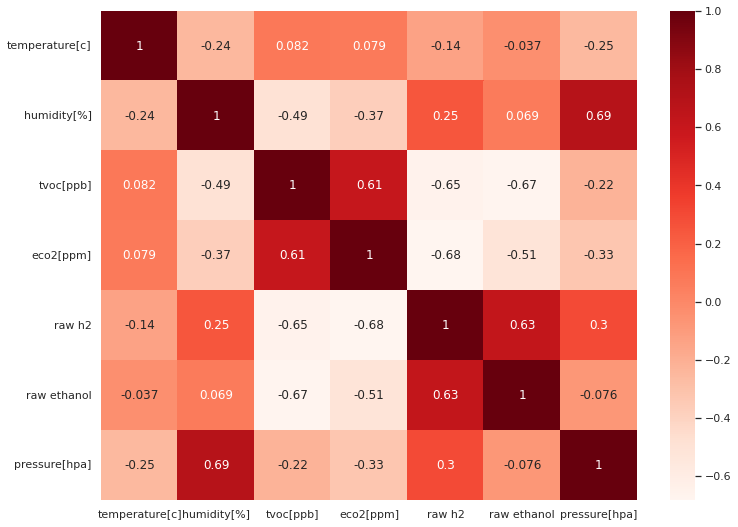

In [ ]:
df_temp = df.loc[:, 'temperature[c]':'pressure[hpa]']
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_temp.corr(), annot=True, cmap='Reds');

a lot of data is correlated, it might be difficult to use a machine learning approach, deep learning might be useful here since its more robust.


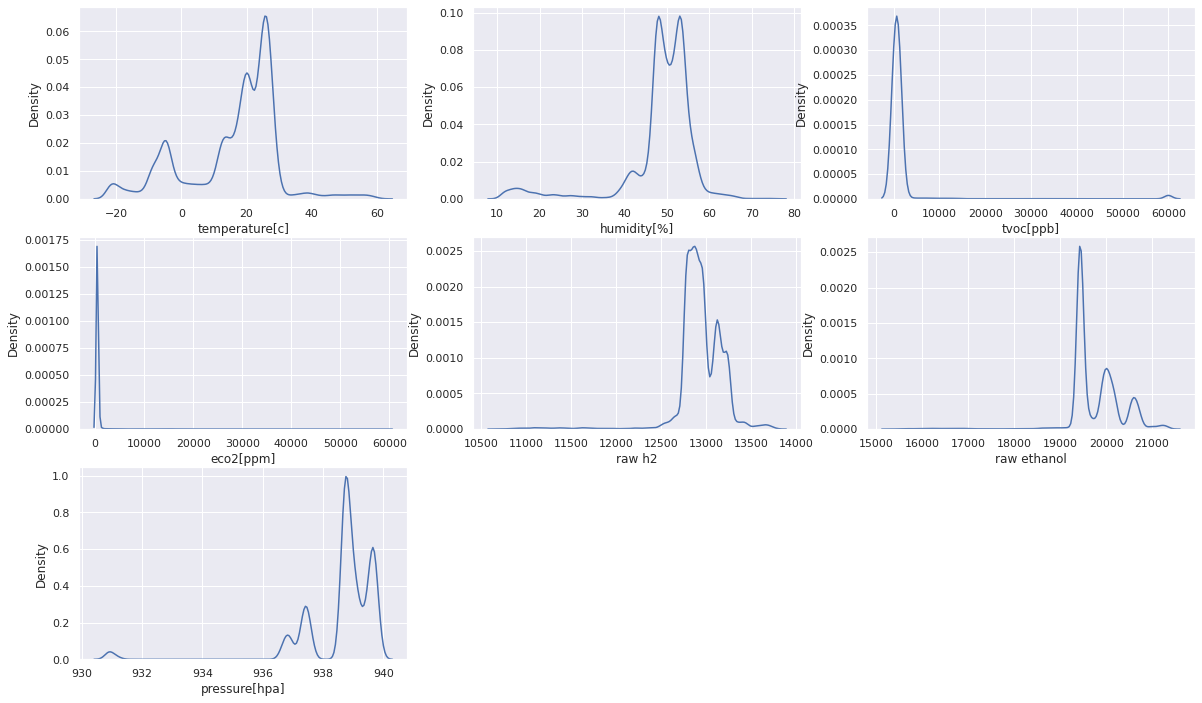

In [ ]:
plt.figure(figsize=(20, 12))
# df_temp.iloc[:, 0]

for i in range(1, 8):
  col = df_temp.iloc[:, i - 1]
  plt.subplot(3, 3, i)
  sns.kdeplot(col);

there exist outliers in the: {pressure, eco2, tvoc} columns

# prepping data for a tf model


In [ ]:
# fetch labels
y = df['fire alarm']
y

0        0
1        0
2        0
3        0
4        0
        ..
62625    0
62626    0
62627    0
62628    0
62629    0
Name: fire alarm, Length: 62630, dtype: int64

`Index(['unnamed: 0', 'utc', 'temperature[c]', 'humidity[%]', 'tvoc[ppb]',
       'eco2[ppm]', 'raw h2', 'raw ethanol', 'pressure[hpa]', 'pm1.0', 'pm2.5',
       'nc0.5', 'nc1.0', 'nc2.5', 'cnt', 'fire alarm'],
      dtype='object')`

In [ ]:
# drop some unneeded columns that creates noise

X = df.drop(['unnamed: 0', 'utc', 'cnt', 'fire alarm'], axis=1)
X

,temperature[c],humidity[%],tvoc[ppb],eco2[ppm],raw h2,raw ethanol,pressure[hpa],pm1.0,pm2.5,nc0.5,nc1.0,nc2.5
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014


In [ ]:
len(X.columns), len(df.columns)

(12, 16)

In [ ]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=21)

In [ ]:
x_train

,temperature[c],humidity[%],tvoc[ppb],eco2[ppm],raw h2,raw ethanol,pressure[hpa],pm1.0,pm2.5,nc0.5,nc1.0,nc2.5
53197,25.810,47.89,131,418,12784,20591,937.336,1.83,1.90,12.57,1.961,0.044
7031,-5.233,50.81,226,400,13138,20032,939.546,0.45,0.47,3.12,0.487,0.011
40608,26.830,47.99,1159,420,12879,19438,938.805,1.62,1.68,11.16,1.740,0.039
57195,26.595,45.37,28,402,12833,20748,937.540,2.26,2.35,15.55,2.425,0.055
26837,18.960,48.26,65,400,13124,20002,939.592,0.61,0.64,4.23,0.659,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,12.697,53.35,1134,400,12889,19448,938.738,1.46,1.51,10.04,1.565,0.035
8964,-5.214,52.62,377,400,13047,19875,939.270,0.42,0.44,2.90,0.452,0.010
5944,-8.732,53.20,86,400,13227,20177,939.625,1.97,2.05,13.55,2.113,0.048
5327,-9.170,54.28,18,400,13255,20214,939.712,2.22,2.31,15.29,2.384,0.054


In [ ]:
y_train

53197    0
7031     1
40608    1
57195    0
26837    0
        ..
16432    1
8964     1
5944     1
5327     1
15305    1
Name: fire alarm, Length: 50104, dtype: int64

0.7147533131087338

In [ ]:
model_baseline = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12, )),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_baseline.compile(loss='binary_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])

history_baseline = model_baseline.fit(x_train, y_train, epochs=10)
print('model_baseline evaluation:\n')
acc_baseline = model_baseline.evaluate(x_test, y_test)

Epoch 1/10
1566/1566 [==============================] - 8s 3ms/step - loss: 7.8880 - accuracy: 0.8223
Epoch 2/10
1566/1566 [==============================] - 4s 3ms/step - loss: 2.1575 - accuracy: 0.8754
Epoch 3/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.8563 - accuracy: 0.8898
Epoch 4/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.4572 - accuracy: 0.9034
Epoch 5/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.2773 - accuracy: 0.9150
Epoch 6/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.2060 - accuracy: 0.9253
Epoch 7/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.2739 - accuracy: 0.9239
Epoch 8/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.3357 - accuracy: 0.9290
Epoch 9/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.1620 - accuracy: 0.9400
Epoch 10/10
392/392 [==============================] - 1s 2ms/step - loss: 0.1330 

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_preds = tf.round(model_baseline.predict(x_test))
y_preds[: 5]


<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

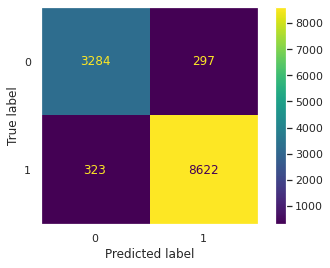

In [ ]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_preds)
ConfusionMatrixDisplay(cm).plot();
plt.grid(False);

there are a lot of false positives and false negatives.

let's check the distrubtion of classes

In [ ]:
# calculate the distrubtion of classes
filt = y == 1
dist = len(y_train[filt]) / len(y_train)
print(f"{dist:.2f}% of samples are in the 1 class")

0.71% of samples are in the 1 class


let's try to increase the complexity of the model and see how does that effect performance.

In [ ]:
model_complex = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12, )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_complex.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

history_complex = model_complex.fit(x_train, y_train, epochs=10)
print('model_complex evaluation:\n')
acc_complex = model_complex.evaluate(x_test, y_test)

Epoch 1/10
1566/1566 [==============================] - 5s 3ms/step - loss: 17.8189 - accuracy: 0.8422
Epoch 2/10
1566/1566 [==============================] - 4s 3ms/step - loss: 2.1699 - accuracy: 0.8931
Epoch 3/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.6850 - accuracy: 0.9106
Epoch 4/10
1566/1566 [==============================] - 4s 3ms/step - loss: 1.4754 - accuracy: 0.9131
Epoch 5/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.3103 - accuracy: 0.9325
Epoch 6/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.1709 - accuracy: 0.9423
Epoch 7/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.1502 - accuracy: 0.9456
Epoch 8/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.1426 - accuracy: 0.9509
Epoch 9/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.1242 - accuracy: 0.9578
Epoch 10/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.10

In [ ]:
y_preds = tf.round(model_complex.predict(x_test))
y_preds[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

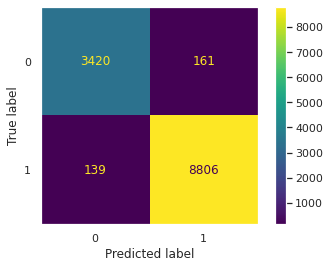

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_preds)
ConfusionMatrixDisplay(cm).plot();
plt.grid(False);

increasing the complexity of the model allowed it to learn more patterns therefore it became more accurate and more robust to false positives and negatives but can the model improve further?
introducing regularization.

In [ ]:
# same as baseline architecture but with regularization.
model_L2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12, )),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu', kernel_regularizer='L2'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_L2.compile(loss='binary_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])

history_L2 = model_L2.fit(x_train, y_train, epochs=10)
print('model_L2 evaluation:\n')
acc_L2 = model_L2.evaluate(x_test, y_test)

Epoch 1/10
1566/1566 [==============================] - 5s 3ms/step - loss: 14.2636 - accuracy: 0.8608
Epoch 2/10
1566/1566 [==============================] - 4s 3ms/step - loss: 3.0986 - accuracy: 0.9002
Epoch 3/10
1566/1566 [==============================] - 4s 3ms/step - loss: 1.9278 - accuracy: 0.9087
Epoch 4/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.8511 - accuracy: 0.9248
Epoch 5/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.4998 - accuracy: 0.9420
Epoch 6/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.3757 - accuracy: 0.9506
Epoch 7/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.2821 - accuracy: 0.9567
Epoch 8/10
1566/1566 [==============================] - 5s 3ms/step - loss: 0.2176 - accuracy: 0.9607
Epoch 9/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.1560 - accuracy: 0.9675
Epoch 10/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.34

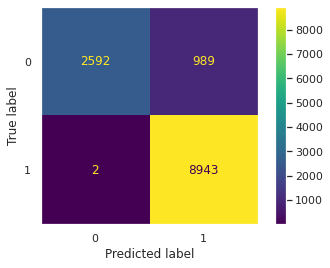

In [ ]:
y_preds = tf.round(model_L2.predict(x_test))
cm = confusion_matrix(y_true=y_test, y_pred=y_preds)
ConfusionMatrixDisplay(cm).plot();
plt.grid(False);

interesting observation, the model has a lot of false positives maybe its caused to the restrictions of the regularization kernel lets change it to another layer

In [ ]:
# same as baseline architecture but with regularization.
model_L2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12, )),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer='L2'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_L2.compile(loss='binary_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])

history_L2 = model_L2.fit(x_train, y_train, epochs=10)
print('model_L2 evaluation:\n')
acc_L2 = model_L2.evaluate(x_test, y_test)

Epoch 1/10
1566/1566 [==============================] - 5s 3ms/step - loss: 11.7816 - accuracy: 0.8529
Epoch 2/10
1566/1566 [==============================] - 5s 3ms/step - loss: 3.6645 - accuracy: 0.8952
Epoch 3/10
1566/1566 [==============================] - 4s 3ms/step - loss: 1.6569 - accuracy: 0.8996
Epoch 4/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.8146 - accuracy: 0.9142
Epoch 5/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.4926 - accuracy: 0.9195
Epoch 6/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.3751 - accuracy: 0.9279
Epoch 7/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.3321 - accuracy: 0.9269
Epoch 8/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.2654 - accuracy: 0.9347
Epoch 9/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.3212 - accuracy: 0.9312
Epoch 10/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.20

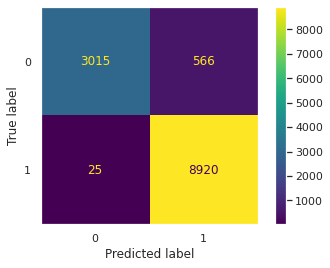

In [ ]:
y_preds = tf.round(model_L2.predict(x_test))
cm = confusion_matrix(y_true=y_test, y_pred=y_preds)
ConfusionMatrixDisplay(cm).plot();
plt.grid(False);

lets try to plot the baseline model and the regularized model CMs but before that let's functionize it.

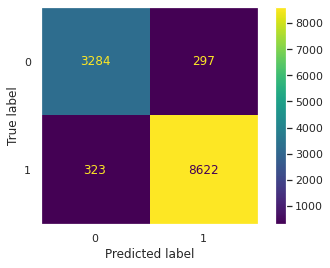

In [ ]:
def plot_cm(model, x_test):
  y_preds = tf.round(model.predict(x_test))
  cm = confusion_matrix(y_true=y_test, y_pred=y_preds)
  ConfusionMatrixDisplay(cm).plot();
  plt.grid(False);

plot_cm(model_baseline, x_test)

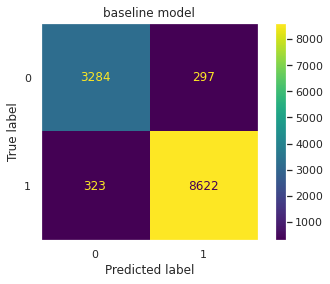

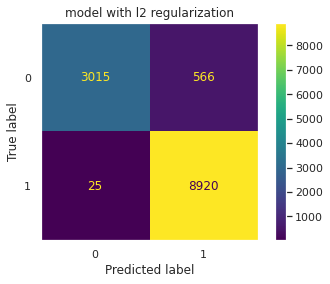

In [ ]:
plot_cm(model_baseline, x_test);
plt.title('baseline model');
# 
plot_cm(model_L2, x_test);
plt.title('model with l2 regularization');

lets try to increase the model complexity so it can reduce false positives

In [ ]:
model_complex_L2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12, )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer='L2'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_complex_L2.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

history_complex_L2 = model_complex_L2.fit(x_train, y_train, epochs=10)
print('model_complex with L2 regularization evaluation:\n')
acc_complex_L2 = model_complex.evaluate(x_test, y_test)

Epoch 1/10
1566/1566 [==============================] - 5s 3ms/step - loss: 14.9172 - accuracy: 0.8336
Epoch 2/10
1566/1566 [==============================] - 4s 3ms/step - loss: 1.8047 - accuracy: 0.8883
Epoch 3/10
1566/1566 [==============================] - 4s 3ms/step - loss: 1.2504 - accuracy: 0.8971
Epoch 4/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.5124 - accuracy: 0.9199
Epoch 5/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.3798 - accuracy: 0.9322
Epoch 6/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.4277 - accuracy: 0.9252
Epoch 7/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.2783 - accuracy: 0.9286
Epoch 8/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.2295 - accuracy: 0.9338
Epoch 9/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.1838 - accuracy: 0.9418
Epoch 10/10
1566/1566 [==============================] - 4s 3ms/step - loss: 0.21

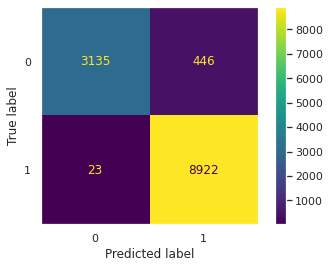

In [ ]:
plot_cm(model_complex_L2, x_test)

In [ ]:
# do more epochs...
model_complex_L2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12, )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer='L2'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_complex_L2.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

history_complex_L2 = model_complex_L2.fit(x_train, y_train, epochs=20)
print('model_complex with L2 regularization evaluation:\n')
acc_complex_L2 = model_complex.evaluate(x_test, y_test)

Epoch 1/20
1566/1566 [==============================] - 5s 3ms/step - loss: 14.1407 - accuracy: 0.8268
Epoch 2/20
1566/1566 [==============================] - 4s 3ms/step - loss: 2.5403 - accuracy: 0.8828
Epoch 3/20
1566/1566 [==============================] - 4s 3ms/step - loss: 1.1356 - accuracy: 0.8966
Epoch 4/20
1566/1566 [==============================] - 4s 3ms/step - loss: 1.2699 - accuracy: 0.9077
Epoch 5/20
1566/1566 [==============================] - 5s 3ms/step - loss: 0.4450 - accuracy: 0.9239
Epoch 6/20
1566/1566 [==============================] - 4s 3ms/step - loss: 0.3452 - accuracy: 0.9302
Epoch 7/20
1566/1566 [==============================] - 4s 3ms/step - loss: 0.2896 - accuracy: 0.9275
Epoch 8/20
1566/1566 [==============================] - 4s 3ms/step - loss: 0.2421 - accuracy: 0.9322
Epoch 9/20
1566/1566 [==============================] - 5s 3ms/step - loss: 0.1862 - accuracy: 0.9410
Epoch 10/20
1566/1566 [==============================] - 4s 3ms/step - loss: 0.15

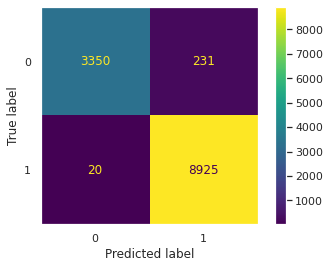

In [ ]:
plot_cm(model_complex_L2, x_test)

lets compare the best performing models

complex model metrics:
 [0.07236674427986145, 0.9760498404502869]
complex model with regularization metrics:
 [0.32280221581459045, 0.9345361590385437]


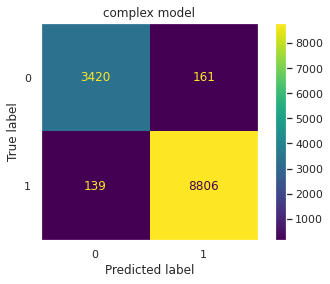

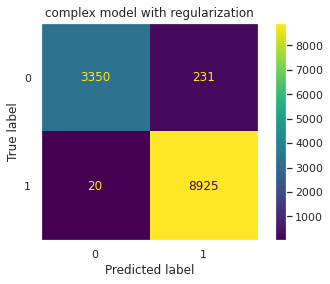

In [ ]:
plot_cm(model_complex, x_test)
plt.title('complex model')
plot_cm(model_complex_L2, x_test)
plt.title('complex model with regularization');
print('complex model metrics:\n', acc_complex)
print('complex model with regularization metrics:\n', acc_complex_L2)

In [ ]:
# add dropout to further reduce variance
model_complex_L2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12, )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer='L2'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_complex_L2.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

history_complex_L2 = model_complex_L2.fit(x_train, y_train, epochs=20)
print('model_complex with L2 regularization evaluation:\n')
acc_complex_L2 = model_complex.evaluate(x_test, y_test)

Epoch 1/20
1566/1566 [==============================] - 5s 3ms/step - loss: 10.5774 - accuracy: 0.7390
Epoch 2/20
1566/1566 [==============================] - 4s 3ms/step - loss: 0.8905 - accuracy: 0.8755
Epoch 3/20
1566/1566 [==============================] - 4s 3ms/step - loss: 0.7446 - accuracy: 0.8868
Epoch 4/20
1566/1566 [==============================] - 5s 3ms/step - loss: 0.5872 - accuracy: 0.8982
Epoch 5/20
1566/1566 [==============================] - 5s 3ms/step - loss: 0.5052 - accuracy: 0.9060
Epoch 6/20
1566/1566 [==============================] - 4s 3ms/step - loss: 0.3283 - accuracy: 0.9207
Epoch 7/20
1566/1566 [==============================] - 4s 3ms/step - loss: 0.2541 - accuracy: 0.9252
Epoch 8/20
1566/1566 [==============================] - 5s 3ms/step - loss: 0.2140 - accuracy: 0.9294
Epoch 9/20
1566/1566 [==============================] - 4s 3ms/step - loss: 0.1990 - accuracy: 0.9327
Epoch 10/20
1566/1566 [==============================] - 5s 3ms/step - loss: 0.18

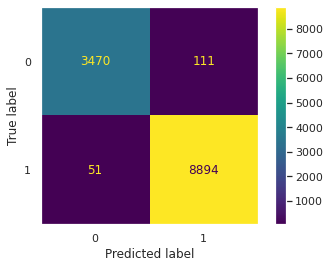

In [ ]:
plot_cm(model_complex_L2, x_test)

the model has signficantly improved and has better metrics, lets compare the baseline model and regularized complex model

baseline model loss:0.13
baseline model acc :0.95
_________________________________________________

reg cmplx model acc:0.07
reg cmplx model acc:0.98
_________________________________________________



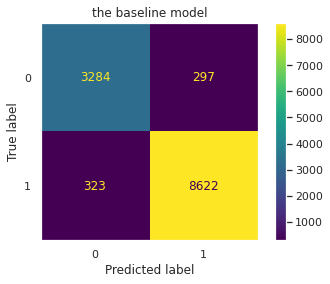

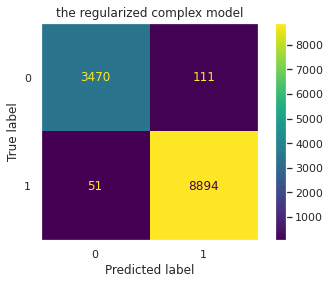

In [ ]:
plot_cm(model_baseline, x_test);
plt.title('the baseline model');
plot_cm(model_complex_L2, x_test);
plt.title('the regularized complex model');
print(f'baseline model loss:{acc_baseline[0]:.2f}')
print(f'baseline model acc :{acc_baseline[1]:.2f}')
print('_________________________________________________')
print()
print(f'reg cmplx model acc:{acc_complex_L2[0]:.2f}')
print(f'reg cmplx model acc:{acc_complex_L2[1]:.2f}')
print('_________________________________________________')
print()